In [1]:
from __future__ import annotations
import numpy as np
#from scipy.stats import norm

from tqdm import trange
from tqdm import tqdm
from time import sleep
#from tqdm.notebook import tqdm_notebook
#from rich.progress import Progress
#from rich.progress import track
from IPython.display import Image

from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-v0_8-pastel')

In [7]:
import sys
# adding Folder_2/subfolder to the system path
sys.path.insert(0, '/workspaces/Jupyter_Dockerbook/')

import pygra.G_body as pg
from pygra.G_evolution import *
from pygra.G_solver import *

In [8]:
run_name = "05"

In [9]:
N = 500000
dt = 1. * 10**6
# Cluster radii (difined as 1 [pc] * 10^{-2}) in [km]
R_cl = np.float64(3.086 * 10**(13-2))
# Cluster mass definition in [M⊙]
m_cl = np.float64(100.)
time_eval = np.linspace(0, N * dt, N + 1, dtype = np.float64)
# Black hole init (mass, position)
central_BH = pg.G_body(np.array([[100.]]), np.array([[0., 0., 0.]]))
# Cluster init (mass of cluster, position, number of bodies)
cluster_1 = pg.G_cluster(m_cl, np.array([[0.,0.,0.]]), 100)
# set cluster masses ditribution
cluster_1.set_mass_uniform_dist()
# set cluster bodies positions ditribution
cluster_1.set_pos_uniform_dist(R_max = R_cl)

# Add a massive Black hole in center of cluster
cluster_1.add_object(central_BH)
# set velocities for all bodies in cluster
cluster_1.set_vel_delta_dist()

In [10]:
#N=100000
G, softening= cluster_1.get_G(), cluster_1.get_softening()
G, softening

(132446351931.33047, 100000000.0)

In [11]:
print("Potential energy for cluster", np.sum(-cluster_1.get_PE(softening)), " Kinetic enegy is ", np.sum(cluster_1.get_KE()))

Potential energy for cluster -22458.44897201386  Kinetic enegy is  8679.643301249478


In [12]:
Cluster_system = G_evolution(cluster_1, time_eval , f"../output/__run_{run_name}/")


Debug: Directory created successfully! (path is ../output/__run_05/)


In [13]:
Cluster_system.debug_print()

Debug print
My properties is:
positions:  [[-2.66523433e+10 -2.53313400e+11 -1.20248528e+11]
 [ 8.65354443e+10  1.34274301e+11  1.62974508e+11]
 [ 1.26633864e+11 -7.76221021e+10 -2.66468445e+11]
 [ 1.84538505e+11  2.14758450e+11  8.91330503e+10]
 [ 1.88005328e+10 -6.86625882e+10  2.17724448e+11]
 [-5.20421222e+10 -3.26407582e+10 -3.42350341e+10]
 [ 1.04178806e+11  1.42700463e+11  1.05099601e+11]
 [-1.11144025e+11  1.08748198e+11 -1.54142356e+11]
 [ 2.42973183e+11 -1.35352618e+11  2.43524159e+10]
 [-3.01124538e+11 -3.82955882e+10  1.99688678e+10]
 [-1.69296365e+10  8.71200909e+09 -1.61772235e+11]
 [ 1.93589162e+11 -1.31590980e+11  1.08046341e+11]
 [-1.21024010e+11 -6.59805089e+10  2.22191396e+11]
 [ 1.70711399e+11 -7.88281987e+10 -1.48094455e+11]
 [-1.10084594e+11 -1.59791738e+10 -2.61759748e+11]
 [ 1.76754757e+11 -1.68028993e+11  4.97441344e+09]
 [ 4.42528958e+10  6.70325206e+10  1.22372027e+11]
 [ 1.29640448e+11  2.01047029e+11  8.68040829e+10]
 [ 4.42313509e+10  2.08921800e+11  4.276

In [14]:
mass = Cluster_system.mass
pos = Cluster_system.pos
vel = Cluster_system.vel

# Custom
## Euler

In [15]:
# Cluster_system.solve('Euler')


## RK4

In [16]:
# Cluster_system.solve('RK4')

# Numba lsoda

In [17]:
Cluster_system.solve('numbalsoda', 'dop853', 1.e-13, 1.e-13)
#Cluster_system.solve('Euler')

  0%|          | 0/1 [00:00<?, ?it/s]

Debug: Data saved in ../output/__run_05//gsim_00000yr.h5 successfully


100%|██████████| 1/1 [03:03<00:00, 183.54s/it]


In [18]:
mass_save, usol2_p, usol2_v, time_save3 = get_data(Cluster_system.get_file()[0] + '/' + Cluster_system.get_file()[1], step = 500)

In [19]:
# Cluster_system.solve('numbalsoda','lsoda', 1.e-13, 1.e-13)

# Scipy

In [20]:
# Cluster_system.solve('scipy','LSODA',5e-14,5e-14)

In [21]:
# Cluster_system.set_time_range(time_eval)
# Cluster_system.solve('scipy','DOP853', 5e-14, 5e-14)

In [22]:
Cluster_system.debug_print()

Debug print
My properties is:
positions:  [[-2.66523433e+10 -2.53313400e+11 -1.20248528e+11]
 [ 8.65354443e+10  1.34274301e+11  1.62974508e+11]
 [ 1.26633864e+11 -7.76221021e+10 -2.66468445e+11]
 [ 1.84538505e+11  2.14758450e+11  8.91330503e+10]
 [ 1.88005328e+10 -6.86625882e+10  2.17724448e+11]
 [-5.20421222e+10 -3.26407582e+10 -3.42350341e+10]
 [ 1.04178806e+11  1.42700463e+11  1.05099601e+11]
 [-1.11144025e+11  1.08748198e+11 -1.54142356e+11]
 [ 2.42973183e+11 -1.35352618e+11  2.43524159e+10]
 [-3.01124538e+11 -3.82955882e+10  1.99688678e+10]
 [-1.69296365e+10  8.71200909e+09 -1.61772235e+11]
 [ 1.93589162e+11 -1.31590980e+11  1.08046341e+11]
 [-1.21024010e+11 -6.59805089e+10  2.22191396e+11]
 [ 1.70711399e+11 -7.88281987e+10 -1.48094455e+11]
 [-1.10084594e+11 -1.59791738e+10 -2.61759748e+11]
 [ 1.76754757e+11 -1.68028993e+11  4.97441344e+09]
 [ 4.42528958e+10  6.70325206e+10  1.22372027e+11]
 [ 1.29640448e+11  2.01047029e+11  8.68040829e+10]
 [ 4.42313509e+10  2.08921800e+11  4.276

## Distance search
Searching, how changes distance between bodies of binary. In classical Newton gravity it shold be constant. But in case of calculation errors it should be a little bit different. Here is search showing how this error different for different methods

In [23]:
def pos_mass_center(mass : FloatArray, pos_t : FloatArray):
    return np.sum(pos_t * mass, axis = 1) / np.sum(mass)
def Cluster_separation_dist_t(mass : FloatArray, pos_t : FloatArray, time_arr : FloatArray) -> FloatArray:
    return np.sqrt(np.sum((pos_mass_center(mass, pos_t)-pos_t[:, -1, :])**2, axis = 1))/(3.086*10**13)

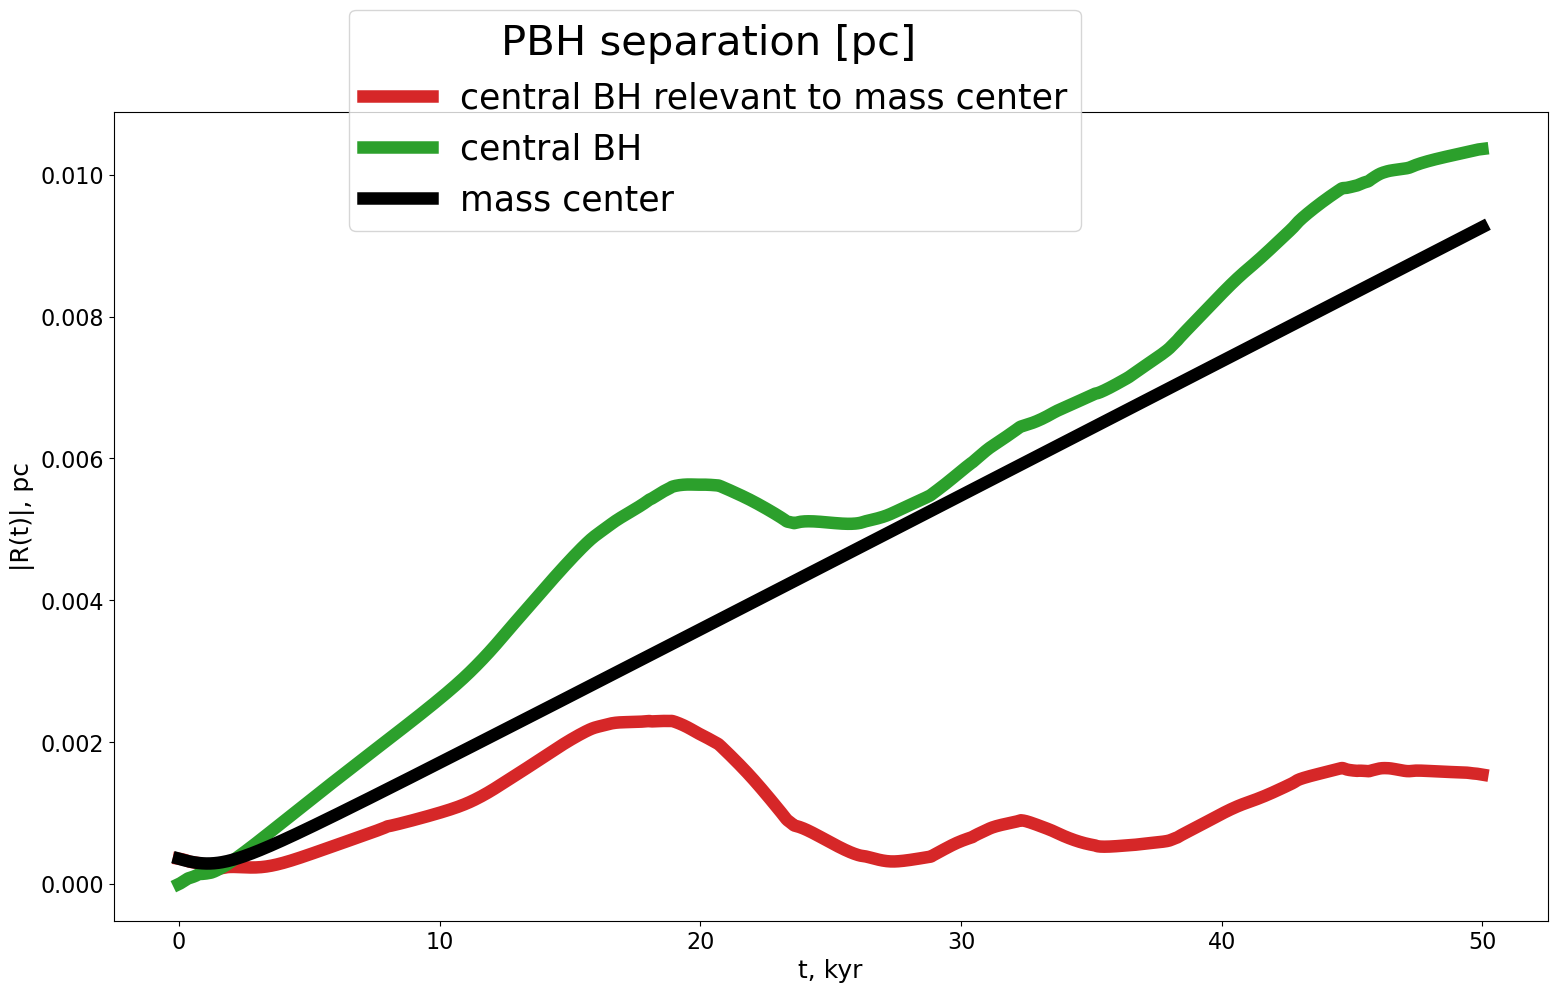

In [24]:
figL, axL = plt.subplots()
axL.plot(time_save3*10**(-10), Cluster_separation_dist_t(mass, usol2_p, time_save3), color = "tab:red", linewidth = 9, label = "central BH relevant to mass center")
axL.plot(time_save3*10**(-10), np.sqrt(np.sum(usol2_p[:,-1,:]**2, axis = 1))/(3.086*10**13), color = "tab:green", linewidth = 9, label = "central BH")
axL.plot(time_save3*10**(-10), np.sqrt(np.sum(pos_mass_center(mass, usol2_p)**2, axis = 1))/(3.086*10**13), color = "black", linewidth = 9, label = "mass center")

axL.set(xlabel = 't, kyr', ylabel = '|R(t)|, pc')
axL.xaxis.label.set_fontsize(18)
axL.yaxis.label.set_fontsize(18)
axL.tick_params(labelsize = 16)
figL.set_size_inches(18.5, 10.5)
lines = []
labels = []

for axL in figL.axes:
    axLine, axLabel = axL.get_legend_handles_labels()
    lines.extend(axLine)
    
    labels.extend(axLabel)
figL.legend( lines, labels,           
           loc = 'lower center', bbox_to_anchor=( 0.45 , 0.75 ), title = 'PBH separation [pc] ', fontsize = 25, title_fontsize = 30)
           

#размер шрифта увеличить для значений осей
figL = axL.get_figure()
figL.savefig(f'../output/__run_{run_name}/pc_graf_10e9.png')

plt.show()

# Energy (t)

In [25]:
from pygra.parallel_acc import getPE_numba
import numba as nb
from numba import njit, prange
@njit(nb.types.Tuple((nb.float64[:, :], nb.float64[:, :]))(
    nb.float64[:], nb.float64[:, :, :], nb.float64[:, :, :], nb.float64, nb.float64), parallel = True)
def get_PEnergy(mass : FloatArray, pos_t : FloatArray, vel_t : FloatArray, __G : np.float64, __softening : np.float64) -> tuple[FloatArray, FloatArray]:
    N, n, k = pos_t.shape
    kinetinc_En : FloatArray =  np.empty((N, n), dtype = np.float64)
    potential_En : FloatArray =  np.empty((N, n), dtype = np.float64)
    for i in prange(N):
        potential_En[i, :] = - getPE_numba(pos_t[i,:,:], mass, __G, __softening)
        kinetinc_En[i, :] = 0.5 * mass * np.sum(vel_t[i, :, :] * vel_t[i, :, :], axis = 1)
    return kinetinc_En, potential_En

KE, PE = get_PEnergy(mass.flatten(), usol2_p, usol2_v, G, softening)

In [26]:
KE.shape, PE.shape

((1001, 101), (1001, 101))

In [27]:
#plt.xlim([0, 1000000*dt])
#x=np.linspace(x_min, x_max, num=500)


figE, axE = plt.subplots()

for ittt in trange(100):
    axE.plot(time_save3*10**(-10), KE[:, ittt], color = "red")#,markevery=100
    axE.plot(time_save3*10**(-10), 0.5 * PE[:, ittt], color = "blue")#,markevery=100

axE.plot(time_save3*10**(-10), 0.5 * PE[:, -1], color = "tab:green", label = 'Central BH PE')#,markevery=100
axE.plot(time_save3*10**(-10), np.sum(KE[:, :], axis = 1), color = "tab:blue", linewidth = 5, label = "KE")#,markevery=100
axE.plot(time_save3*10**(-10), KE[:, -1], color = "cyan", label = 'Central BH KE')#,markevery=100
axE.plot(time_save3*10**(-10), 0.5 * np.sum(PE[:, :], axis = 1), color = "gray", linewidth = 5, label = "PE")
axE.plot(time_save3*10**(-10), np.sum(KE[:, :] + 0.5 * PE[:, :], axis = 1), color = "black", linewidth = 5, label = "Total E")

axE.set(xlabel='t,kyr', ylabel='E(t)')
axE.xaxis.label.set_fontsize(18)
axE.yaxis.label.set_fontsize(18)
axE.tick_params(labelsize=16)
#axL.grid(True)
#ax3.set_ylim(1, 3);
figE.set_size_inches(18.5, 10.5)
lines = []
labels = []

for axE in figE.axes:
    axLine, axLabel = axE.get_legend_handles_labels()
    lines.extend(axLine)
    
    labels.extend(axLabel)
figE.legend( lines, labels,           
           loc = 'lower center', bbox_to_anchor=( 0.65 , 0.72 ), title = 'Total Energy ', fontsize = 25, title_fontsize = 30)
           

figE = axE.get_figure()
figE.savefig(f'../output/__run_{run_name}/E_graf.png')

plt.show()

100%|██████████| 100/100 [00:00<00:00, 1278.67it/s]


100%|██████████| 101/101 [00:00<00:00, 1356.57it/s]


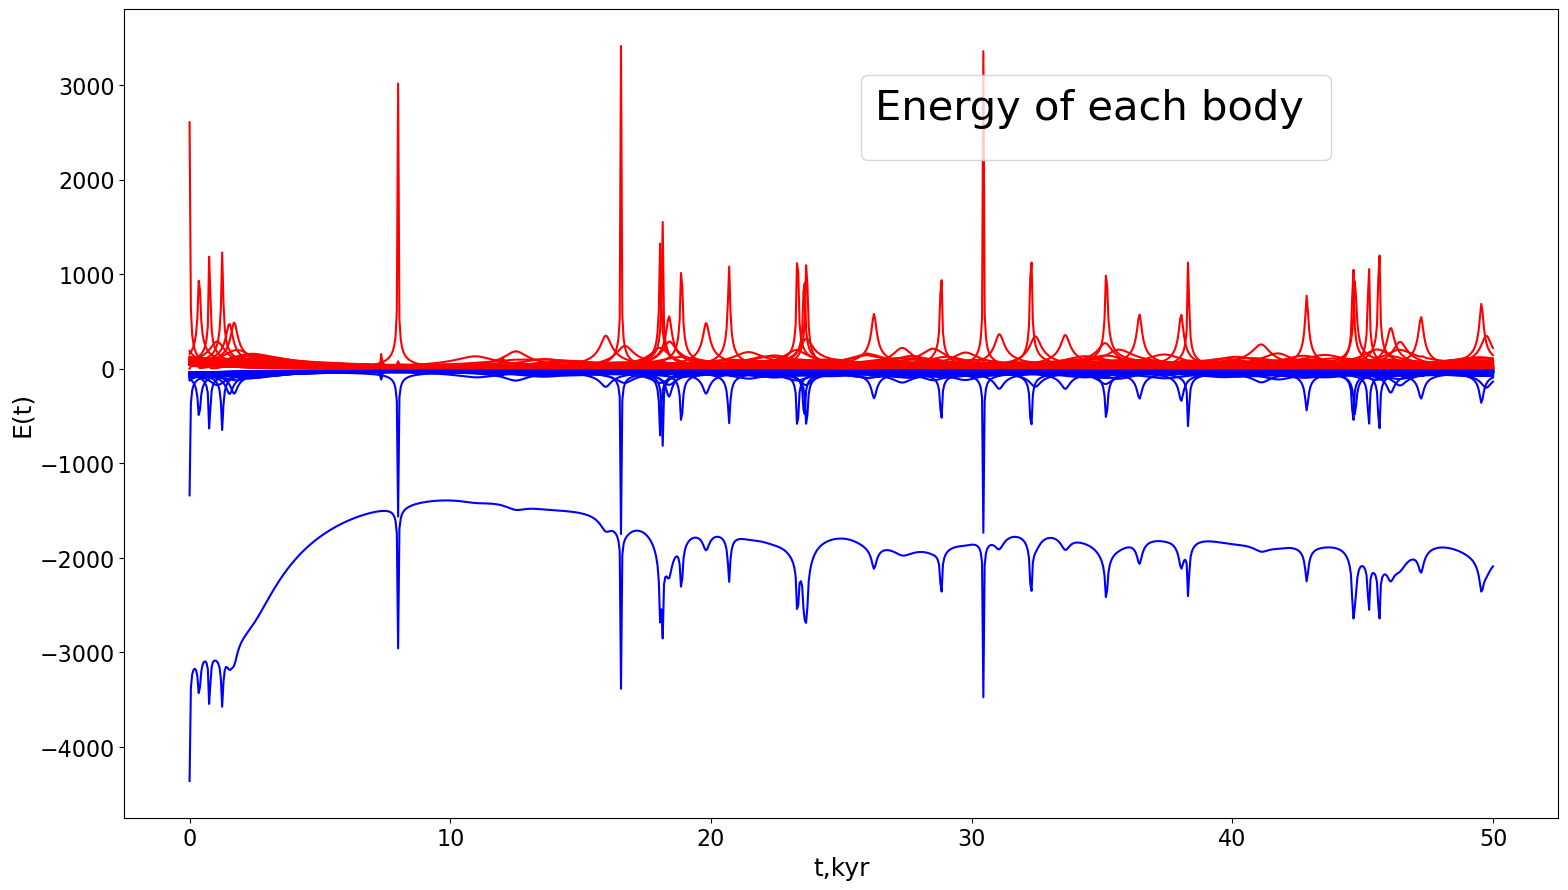

In [28]:
#plt.xlim([0, 1000000*dt])
#x=np.linspace(x_min, x_max, num=500)


figE, axE = plt.subplots()

for ittt in trange(101):
    axE.plot(time_save3*10**(-10), KE[:, ittt], color = "red")#,markevery=100
    axE.plot(time_save3*10**(-10), 0.5 * PE[:, ittt], color = "blue")#,markevery=100

axE.set(xlabel='t,kyr', ylabel='E(t)')
axE.xaxis.label.set_fontsize(18)
axE.yaxis.label.set_fontsize(18)
axE.tick_params(labelsize=16)
#axL.grid(True)
#ax3.set_ylim(1, 3);
figE.set_size_inches(18.5, 10.5)
lines = []
labels = []

for axE in figE.axes:
    axLine, axLabel = axE.get_legend_handles_labels()
    lines.extend(axLine)
    
    labels.extend(axLabel)
figE.legend( lines, labels,           
           loc = 'lower center',bbox_to_anchor=( 0.65 , 0.72 ),title = 'Energy of each body ', fontsize=25,title_fontsize=30)
           

figE = axE.get_figure()
figE.savefig(f'../output/__run_{run_name}/E_graf_ibody.png')

plt.show()

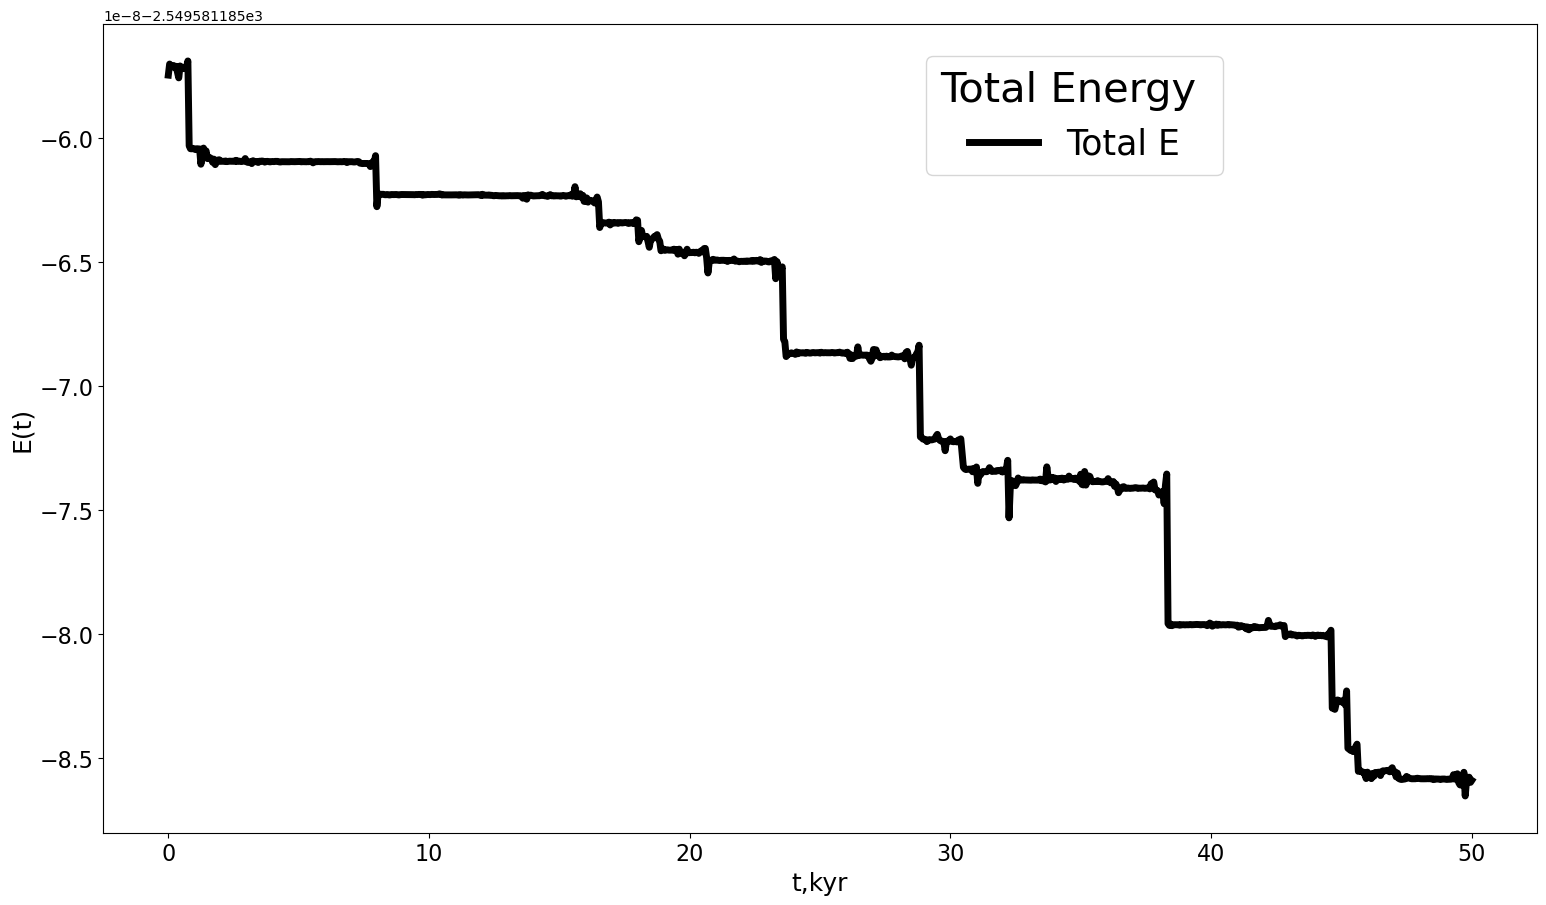

In [29]:
#plt.xlim([0, 1000000*dt])
#x=np.linspace(x_min, x_max, num=500)


figE, axE = plt.subplots()

# for ittt in trange(100):
#     axE.plot(time_save3*10**(-10), KE[:, ittt], color = "red")#,markevery=100
#     axE.plot(time_save3*10**(-10), 0.5 * PE[:, ittt], color = "blue")#,markevery=100

# axE.plot(time_save3*10**(-10), 0.5 * PE[:, -1], color = "tab:green", label = 'Central BH PE')#,markevery=100
# axE.plot(time_save3*10**(-10), np.sum(KE[:, :], axis = 1), color = "tab:blue", linewidth = 5, label = "KE")#,markevery=100
# axE.plot(time_save3*10**(-10), KE[:, -1], color = "cyan", label = 'Central BH KE')#,markevery=100
# axE.plot(time_save3*10**(-10), 0.5 * np.sum(PE[:, :], axis = 1), color = "gray", linewidth = 5, label = "PE")
axE.plot(time_save3*10**(-10), np.sum(KE[:, :] + 0.5 * PE[:, :], axis = 1), color = "black", linewidth = 5, label = "Total E")

axE.set(xlabel='t,kyr', ylabel='E(t)')
axE.xaxis.label.set_fontsize(18)
axE.yaxis.label.set_fontsize(18)
axE.tick_params(labelsize=16)
#axL.grid(True)
#ax3.set_ylim(1, 3);
figE.set_size_inches(18.5, 10.5)
lines = []
labels = []

for axE in figE.axes:
    axLine, axLabel = axE.get_legend_handles_labels()
    lines.extend(axLine)
    
    labels.extend(axLabel)
figE.legend( lines, labels,           
           loc = 'lower center', bbox_to_anchor=( 0.65 , 0.72 ), title = 'Total Energy ', fontsize = 25, title_fontsize = 30)
           

figE = axE.get_figure()
figE.savefig(f'../output/__run_{run_name}/E_TOT_graf.png')

plt.show()

# Gif animation

In [30]:
# scale - is a scale for plot
# N_T=N_T/dN_T - is number of steps per dN_t - step len for pos save
# dN_T2 - step for plot's impages saving
def print_gif(pos_save, scale, N_T, dN_T2 = 100, run_name = "0"): #N_T=N_T/dN_T
    for i in range(100):
        name = "../output/__run_"+run_name+"/Pic_t"
        try:
            os.makedirs(name)
            print("Directory created successfully! (path is " + name + ")")
            break
        except OSError as error:
            name = "../output/__run_" + str(i) + "/"
            if i == 99: print(f"Directory creation failed: {error}")
    figFF, ax1 = plt.subplots()
    ax1.grid(True)
    ax1.legend(prop = {'size': 15})
    ax1.set(title = '$Animation$', xlabel = '$x$', ylabel = '$y$')
    ax1.set_ylim(-scale, scale)
    ax1.set_xlim(-scale, scale)
    plt.ioff()
    pbar = tqdm(total = N_T/dN_T2)
    line = ax1.scatter(pos_save[:, :-1, 0], pos_save[:, :-1, 1], s = 10, color = 'tab:blue')
    line2 = ax1.scatter(pos_save[:, -1, 0], pos_save[:, -1, 1], s = 10, color = 'tab:red')

    for i in range(0, int(N_T), dN_T2):
        line.set_offsets(np.vstack((pos_save[i+1, :-1, 0], pos_save[i+1, :-1, 1])).T)
        line2.set_offsets(np.vstack((pos_save[i+1,-1:, 0], pos_save[i+1, -1, 1])).T)
        figFF = ax1.get_figure()
        figFF.savefig(f'../output/__run_{run_name}/Pic_t/saved_figure_' + str(i) + '.png')
        plt.close(figFF)
        plt.clf()
        pbar.update(1)
    pbar.close()    

    # Images list init
    frames = []
    from PIL import Image
    for frame_number in trange(0, int(N_T), dN_T2):
        # Open image for each moment
        frame = Image.open(f'../output/__run_{run_name}/Pic_t/saved_figure_{frame_number}.png')
        # add image to list of images.
        frames.append(frame)
        
    # Save all images with the first one
    frames[0].save(
        f'../output/__run_{run_name}/homer2.gif',
        save_all = True,
        append_images = frames[1:],  # Ignore first image
        optimize = True,
        duration = 1,
        loop = 0
    )
print_gif(usol2_p, 5 * R_cl, time_save3.shape[0]-10, 10, run_name)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Directory created successfully! (path is ../output/__run_05/Pic_t)


100it [00:05, 17.83it/s]                         
100%|██████████| 100/100 [00:00<00:00, 673.71it/s]


<Figure size 640x480 with 0 Axes>

In [31]:
from IPython.display import Image
Image(f'../output/__run_{run_name}/homer2.gif')